### 7 앙상블 학습과 랜덤 포레스트
일련의 예측기로부터 예측을 수집하면 가장 좋은 모델하나보다 더 좋은 예측을 얻을 수 있다.
일련의 예측기를 앙상블이라고 한다.

훈련 세트로부터 무작위로 각기 다른 서브셋을 만들어 일련의 결정 트리 분류기를 훈련시킬수 있다.
많은 선택을 받은 클래스를 예측으로 삼는다.

결정트리의 앙상블을 랜덤포레스트라고 한다.

#### 7.1 투표기반 분류기
각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는 것이다.
이처럼 다수결 투표로 정해지는 분류기를 직접투표 분류기라고 한다.

약한 학습기 : 랜덤 추측보다 조금 더 높은 성능
강한 학습기 : 높은 정확도를 낸다.

간접 투표 : 모든 분류기가 클래스의 확률을 예측할 수 있으면 
            개별분류기의 예측을 평균내어 확률이 가장 높은 클래스를 예측할 수 있다.
            
SVC 에서는 클래스 확률을 제공하지 않으므로 Probability = true로 지정하면 교차검증을 사용하므로 훈련속도가 느려지지만
SVC 에서 predict_proba() 메서드를 사용할 수 있다.

#### 7.2 배깅과 페이스팅

배깅 : 중복허용
페이스팅 : 중복미허용
cpu 코어나 서버에서 병렬로 학습시킬 수 있다.
예측도 병렬로 수행할 수 있다.

In [13]:
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X, y = make_moons(n_samples=400, noise=0.3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples=100, bootstrap = True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)



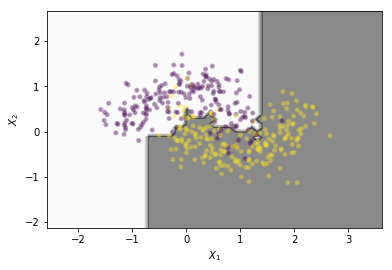

In [30]:
import numpy as np
plot_step = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Greys, alpha = 0.5)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=10, linewidth=2, alpha = 0.3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()


#### 7.2.2 oob 평가
배깅을 사용하면 어떤 샘플은 한 예측기에 여러번 샘플링 되고
어떤것은 선택되지 않는 경우가 생긴다.
평균적으로 63%정도만 각 예측기에 훈련 샘플이 샘플링 된다
나머지 37%는 oob (out of bag)라고 부른다.
앙상블의 평가는 각 예측기의 oob평가를 평균하여 얻는다.

In [20]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)  # oob_score = ture 는 훈련 끝난후 자동으로 oob평가
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_ 

0.8866666666666667

In [21]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred) #oob 평가 결과를 통해 얻어낸 0.88과 근사한 값을 얻을것임

0.88

oob샘플에 대한 결정함수의 값도 oob_decision_function_변수에서 확인가능
결정함수는 각 훈련 샘플의 클래스 확률을 반환한다.

In [23]:
bag_clf.oob_decision_function_

array([[1.        , 0.        ],
       [0.9281768 , 0.0718232 ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.03428571, 0.96571429],
       [0.98453608, 0.01546392],
       [0.99494949, 0.00505051],
       [0.81122449, 0.18877551],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.17816092, 0.82183908],
       [0.39896373, 0.60103627],
       [1.        , 0.        ],
       [0.8988764 , 0.1011236 ],
       [0.98974359, 0.01025641],
       [0.02272727, 0.97727273],
       [0.06629834, 0.93370166],
       [0.47619048, 0.52380952],
       [0.91907514, 0.08092486],
       [1.        , 0.        ],
       [0.04678363, 0.95321637],
       [1.        , 0.        ],
       [0.93975904, 0.06024096],
       [1.        , 0.        ],
       [0.53005464, 0.46994536],
       [0.99479167, 0.00520833],
       [0.        , 1.        ],
       [0.79473684, 0.20526316],
       [0.01136364, 0.98863636],
       [1.

### 7.3 랜덤 패치와 서브 스페이스
BaggingClassifier는 특성 샘플링도 지원한다.
max_features, bootstrap_features 매개변수가 그것이다.
이미지와 같은 고차원 데이터셋에서 유용하다.

샘플과 훈련특성 모두 샘플링하는 것을 램덤 패치 방식이라 한다.
훈련샘플을 모두 사용하고 특성은 샘플링하는 것을 랜덤 서브스페이스 방식이라 한다.
특성 샘플링을 통해 편향을 늘리고 분산을 낮춘다.

### 7.4 램덤 포레스트
#### 7.4.1 엑스트라 트리
트리를 무작위하게 만들기위해 최적의 임계값을 찾는 대신 후보 특성을 사용해 무작위로 분할한 다음 
ㄱ그중에서 최상의 분할을 선택합니다.
모든 노드에서 특성마다 최적의 임곗값을 찾는것이 트리 알고리즘에서 가장 시간이 많이 소요되므로
일반적으로 엑스트라 트리가 빠르다.
#### 7.4.2 특성 중요도
랜덤 포레스트는 특성의 상대적 중요도를 측정하기 쉽다.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs = -1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10935657120165733
sepal width (cm) 0.026675223652580207
petal length (cm) 0.4137648872363561
petal width (cm) 0.4502033179094063


### 7.5 부스팅 
약한 학습기 여러 개를 연결하여 강한 학습기를 만드는 앙상블 방법
#### 7.5.1 아다부스트
이전모델이 과소적합했던 훈련샘플의 가중치를 더 높이는것
이렇게 함으로써 새로운 학습기는 학습하기 더 어려운 샘플에 더 맞춰지게 된다.
연속된 학습 기법이기에 병렬화, 분할을 할 수 없다.
배깅이나 페이스팅처럼 확장성이 높지 않다.

#### 7.5.2 그래디언트 부스칭
이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습시킵니다.

### 7.6 스태킹
모든 예측기의 예측을 취합하는 간단한 함수를 사용하는 대신 취합하는 모델을 훈련